<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/BannerUFPR.png" width="700" alt="PPGOLD/PPGMNE Python:INTRO"  />
</p>

# Data Science for Businnes - Aula 07

## Prof. Eduardo Pécora

## Decison Tree
Tempo estimado: **30** minutos

## Objetivos

Após completar esta aula, você será capaz de:

* Aplicar o Algoritmo de classificação em árvores
* Interpretar os resultados deste algoritmo

# Case de distribuição de e-commerce



### Verificar a versão do Python e importar as bibliotecas básicas

In [22]:
# check Python version
!python -V

import pandas as pd # download library to read data into dataframe
import numpy as np # import numpy library
import matplotlib.pyplot as plt # plots
import collections
import random # library for random number generation

Python 3.10.14


## Importar Arquivo de dados

Inclua um CSV com os dados a serem analisados
 * Incluindo cabeçalho
 * Separação de campos delimitado por *,*
 * Separação de linha usando *nova linha*

 O arquivo tem mais de 12000 registros, pode levar alguns segundos.

In [23]:
print("Data read into dataframe!")

file_path = "https://raw.githubusercontent.com/EduPekUfpr/PythonProject/refs/heads/main/Dados/Distribution_12k.csv"

starsData = pd.read_csv(file_path)
starsData.head()

Data read into dataframe!


,Stars,Product,Origin,CD_name,Dest,DistanceTravelled_Fac_CD,TruckType,DriverF_CD,DaysStocked,FloorCD,DistanceTravelled_CD_Client,TruckType2,DriverCD_C,RoutDeliveryOrder
0,4.0,P6,F4,CD2,C203,162,SemiTrailler,D05,37,2,59.7,CityDeliveryTruck,D2_2,2
1,1.0,P2,F3,CD2,C202,162,SemiTrailler,D06,5,0,94.2,MiniVan,D2_4,3
2,5.0,P6,F3,CD2,C202,162,SemiTrailler,D04,27,0,30.9,Van,D2_7,1
3,2.0,P9,F3,CD2,C202,162,SemiTrailler,D03,14,0,89.7,Van,D2_7,3
4,5.0,P9,F2,CD3,C305,58,Truck,D03,30,1,171.7,Van,D3_2,6


## Padronização do DataTable


### Renomear a primeira coluna para "stars"

Para se adequar ao código

In [24]:
# mudando o nome da coluna de Stars para stars
column_names = starsData.columns.values
print(starsData.columns.values)
column_names[0] = "stars"
starsData.columns = column_names
print(column_names)


['Stars' 'Product' 'Origin' 'CD_name' 'Dest' 'DistanceTravelled_Fac_CD'
 'TruckType' 'DriverF_CD' 'DaysStocked' 'FloorCD'
 'DistanceTravelled_CD_Client' 'TruckType2' 'DriverCD_C'
 'RoutDeliveryOrder']
['stars' 'Product' 'Origin' 'CD_name' 'Dest' 'DistanceTravelled_Fac_CD'
 'TruckType' 'DriverF_CD' 'DaysStocked' 'FloorCD'
 'DistanceTravelled_CD_Client' 'TruckType2' 'DriverCD_C'
 'RoutDeliveryOrder']


## Verificando os dados

 Em um contexto real, deveríamos verificar cada coluna minuciosamente procurando por valores fora dos padrões. Mas aqui vamos "verificar" somente a coluna "stars"

### Exemplos mais comuns de valores fora dos padrões são: 

* Valores numéricos fora do intervalo, por exemplo quantidades de estrelas igual a 15, quando devia ser de 1 a 5.
* Texto no local de valores numéricos
* Valores "nan" Not a Number
* Para valores de categorias, no nosso exemplo os produtos são P1, P2, P3; Caso apareca um "Produto 1" precisa ser uniformizado


In [25]:
starsData["stars"].value_counts() # Tabela de frequencia

print(starsData["stars"].mean()) #média das estrelas

c = collections.Counter(starsData["stars"]) #frequencia de cada valor
c = sorted(c.items()) 
print(c)

stars_num = [i[0] for i in c] # todos os possíveis valores que temos em stars
freq = [i[1] for i in c] # todas as frequencias

print(stars_num)

3.028867985728187
[(1.0, 2303), (2.0, 2383), (3.0, 2769), (4.0, 2469), (5.0, 2357), (6.0, 48), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (7.0, 1), (9.0, 1), (11.0, 1)]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 7.0, 9.0, 11.0]


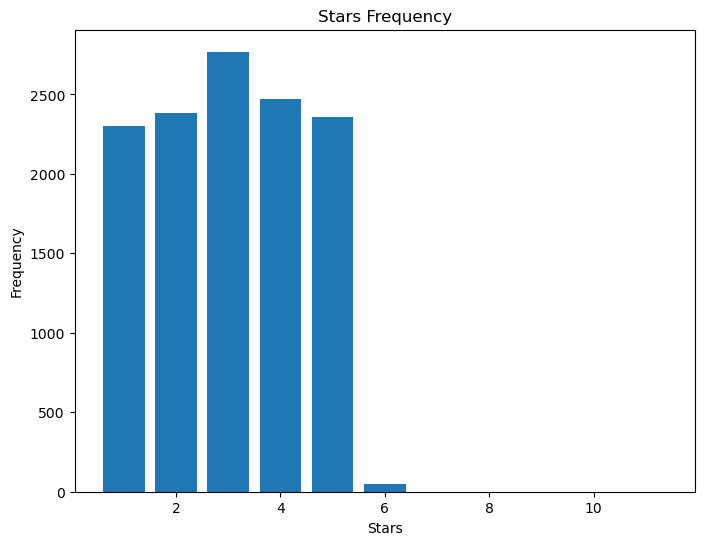

In [26]:
f, ax = plt.subplots(figsize=(8,6))

plt.bar(stars_num, freq) # visualizando a distribuição

plt.title("Stars Frequency")
plt.xlabel("Stars")
plt.ylabel("Frequency")

plt.show()

In [40]:
# Sabendo que os intervalos corretos para FloorCD e RoutDeliveryOrder devem ser [0,4] e [1,6], respectivamente. Podemos checar se os seua valores seguem esses intervalos

print(sorted(starsData["FloorCD"].unique()))

print(sorted(starsData["RoutDeliveryOrder"].unique()))

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5, 6]


### Existem dados fora do intervalo de estrelas [1,5] , alguns valores são 6 outros são NAN

Nesse caso só podemos limpar os dados de estrelas fora do intervalo [1,5], excluindo os registros

In [28]:
starsData = starsData[(starsData["stars"] <= 5) & (starsData["stars"] >= 1)] # somente valores dentro do intervalo [1,5]

starsData = starsData.reset_index(drop=True) # É importante refazer o indice do dataFrame, apeos excluir linhas, pois pode gerar problema no SciKit Learn

# observando após as mudanças

print(starsData["stars"].mean())

c = collections.Counter(starsData["stars"])
c = sorted(c.items())
print(c)

stars_num = [i[0] for i in c]
freq = [i[1] for i in c]

print(stars_num)

3.0157967592215615
[(1.0, 2303), (2.0, 2383), (3.0, 2769), (4.0, 2469), (5.0, 2357)]
[1.0, 2.0, 3.0, 4.0, 5.0]


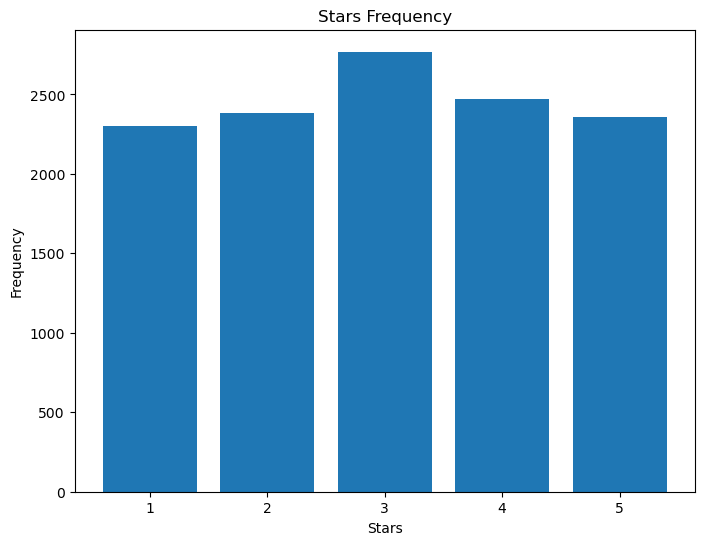

In [41]:
f, ax = plt.subplots(figsize=(8,6))

plt.bar(stars_num, freq)

plt.title("Stars Frequency")
plt.xlabel("Stars")
plt.ylabel("Frequency")

plt.show()

## Outras inconsistências nos dados

Note a coluna Driver_F_CD, ela só tem os valores "D01" ... "D06" mas não sabemos se o motorista D01 pode trabalhar no CD1, CD2 ou CD3 ? Isso não te parece no mínimo esquisito ?

**Fica como Lição de casa você pensar em uma alternativa**


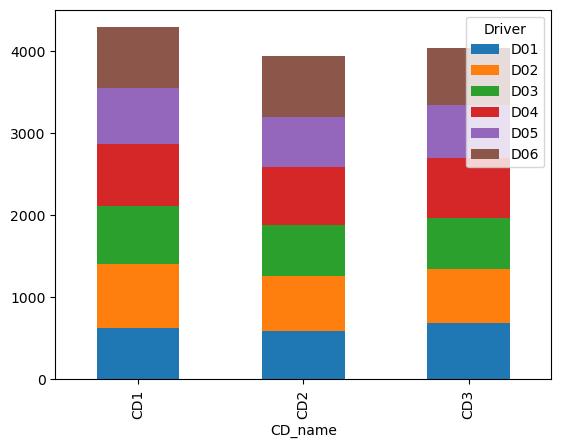

DriverF_CD  D01  D02  D03  D04  D05  D06
CD_name                                 
CD1         632  776  704  752  684  744
CD2         588  676  620  700  620  744
CD3         689  660  624  720  648  700


In [42]:
ct = pd.crosstab(index=starsData['CD_name'], columns=starsData['DriverF_CD']) #criando tabela de frequencia entre CD_name e DriverF_CD

ct.plot.bar(stacked=True)
plt.legend(title='Driver')

plt.show()

print(ct)

## Começando a análise

### Importar as bibliotecas: 
* SKLEARN
* graphviz
* matplotlib


In [31]:
# import decision trees scikit-learn libraries
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix # Não usaremos essas métricas neste exemplo

import matplotlib.pyplot as plt

#!conda install python-graphviz --yes
import graphviz

from sklearn.tree import export_graphviz

import itertools

## Separar o dataFrame em variáveis dependentes e independentes

In [32]:
# split the DataFrame
stars = starsData["stars"] # Só a coluna "stars"
stars_class = stars[:]
variables = starsData.iloc[:,1:] # Todas as outras colunas com excessão da "stars"

print(stars_class.head())
variables.head()

0    4.0
1    1.0
2    5.0
3    2.0
4    5.0
Name: stars, dtype: float64


,Product,Origin,CD_name,Dest,DistanceTravelled_Fac_CD,TruckType,DriverF_CD,DaysStocked,FloorCD,DistanceTravelled_CD_Client,TruckType2,DriverCD_C,RoutDeliveryOrder
0,P6,F4,CD2,C203,162,SemiTrailler,D05,37,2,59.7,CityDeliveryTruck,D2_2,2
1,P2,F3,CD2,C202,162,SemiTrailler,D06,5,0,94.2,MiniVan,D2_4,3
2,P6,F3,CD2,C202,162,SemiTrailler,D04,27,0,30.9,Van,D2_7,1
3,P9,F3,CD2,C202,162,SemiTrailler,D03,14,0,89.7,Van,D2_7,3
4,P9,F2,CD3,C305,58,Truck,D03,30,1,171.7,Van,D3_2,6


## Adequação das variáveis categóricas em colunas binárias - OneHotEncoder




In [33]:
#from sklearn.preprocessing import OneHotEncoder

#enc = OneHotEncoder(sparse_output=False) # problema com sparse_output

# conseguindo todas as colunas categóricas
cat = [i for i in variables.columns if variables[i].dtypes == "O"]

# excluindo DriverF_CD
cat.remove('DriverF_CD')

cat_one_hot_list = []
for i in cat:
    cat_one_hot_list.append(pd.get_dummies(variables[[i]])) #get_dummies transforma categorias em colunas e codifica binariamente

cat_one_hot_list.append(variables["RoutDeliveryOrder"])
cat_one_hot_list.append(variables["FloorCD"])

var1 = pd.concat(cat_one_hot_list, axis=1) #concatenando horizontamente

var1.head()

,Product_P1,Product_P10,Product_P11,Product_P12,Product_P13,Product_P14,Product_P15,Product_P2,Product_P3,Product_P4,...,DriverCD_C_D2_7,DriverCD_C_D3_1,DriverCD_C_D3_2,DriverCD_C_D3_3,DriverCD_C_D3_4,DriverCD_C_D3_5,DriverCD_C_D3_6,DriverCD_C_D3_7,RoutDeliveryOrder,FloorCD
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,2
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,3,0
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,1,0
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,3,0
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,6,1


## DecisionTreeClassifier e os seus Parâmetros

O algoritimo do DecisionTreeClassifier tem a tendência natural de fazer um OVERFITING, para ajustar isso modificamos os parâmetros:

* max_depth : Profundidade máxima da árvore
* min_samples_split : quantidade mínima de amostras para se dividir um nó
* min_samples_leaf : Quantidade mínima de amostras em um nó folha (nó da base da árvore)

In [34]:
delivery_tree = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 2, min_samples_leaf = 1)
delivery_tree.fit(var1, stars_class)

print("Decision tree model saved to delivery_tree!")
print(delivery_tree)
print(var1.columns.values)

Decision tree model saved to delivery_tree!
DecisionTreeClassifier(max_depth=4)
['Product_P1' 'Product_P10' 'Product_P11' 'Product_P12' 'Product_P13'
 'Product_P14' 'Product_P15' 'Product_P2' 'Product_P3' 'Product_P4'
 'Product_P5' 'Product_P6' 'Product_P7' 'Product_P8' 'Product_P9'
 'Origin_F1' 'Origin_F2' 'Origin_F3' 'Origin_F4' 'CD_name_CD1'
 'CD_name_CD2' 'CD_name_CD3' 'Dest_C101' 'Dest_C102' 'Dest_C103'
 'Dest_C104' 'Dest_C105' 'Dest_C201' 'Dest_C202' 'Dest_C203' 'Dest_C204'
 'Dest_C205' 'Dest_C301' 'Dest_C302' 'Dest_C303' 'Dest_C304' 'Dest_C305'
 'TruckType_SemiTrailler' 'TruckType_Truck' 'TruckType2_CityDeliveryTruck'
 'TruckType2_MiniVan' 'TruckType2_Van' 'DriverCD_C_D1_1' 'DriverCD_C_D1_2'
 'DriverCD_C_D1_3' 'DriverCD_C_D1_4' 'DriverCD_C_D1_5' 'DriverCD_C_D1_6'
 'DriverCD_C_D1_7' 'DriverCD_C_D2_1' 'DriverCD_C_D2_2' 'DriverCD_C_D2_3'
 'DriverCD_C_D2_4' 'DriverCD_C_D2_5' 'DriverCD_C_D2_6' 'DriverCD_C_D2_7'
 'DriverCD_C_D3_1' 'DriverCD_C_D3_2' 'DriverCD_C_D3_3' 'DriverCD_C_D3_4'


## Resultados em formato gráfico são sempre melhores &#x1F600;

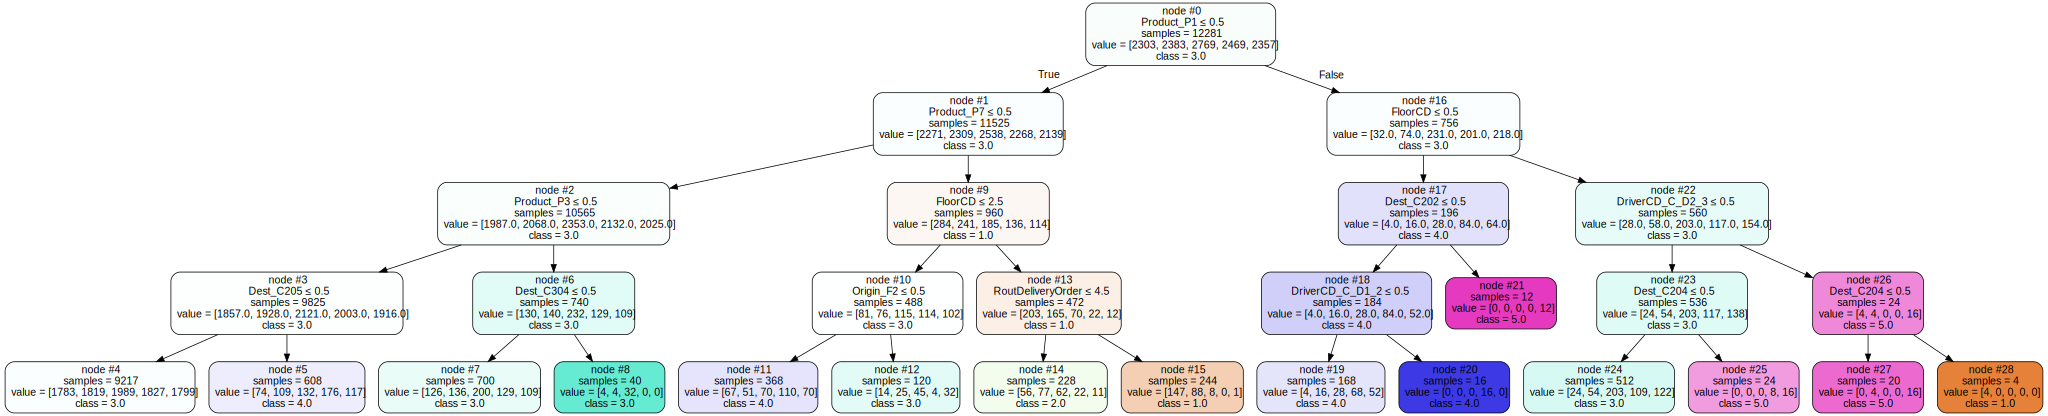

In [35]:
export_graphviz(delivery_tree,
                feature_names=list(var1.columns.values),
                out_file="delivery_tree.dot",
                class_names=np.unique(stars_class.astype(str)),
                filled=True,
                rounded=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel = False) #construindo uma visualização da arvore com o graphviz

with open("delivery_tree.dot") as delivery_tree_image:
    delivery_tree_graph = delivery_tree_image.read()
    
graphviz.Source(delivery_tree_graph) # visualizando a arvore

## *Modificar a variável dependente para (bad, average, good) ao invés de [1,5]*

Isso nos permitira encontrar mais facilmente as causas das viagens ruins

Atenção: na saída gráfica os valores do vetor Value estarão em ordem alfabeetica, ou seja, (average, bad, good)

/var/folders/fr/1byq_zn551q9hcfd9_hhlv5h0000gn/T/ipykernel_45978/3479830749.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'bad' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stars_class.loc[stars <= 2] = "bad"


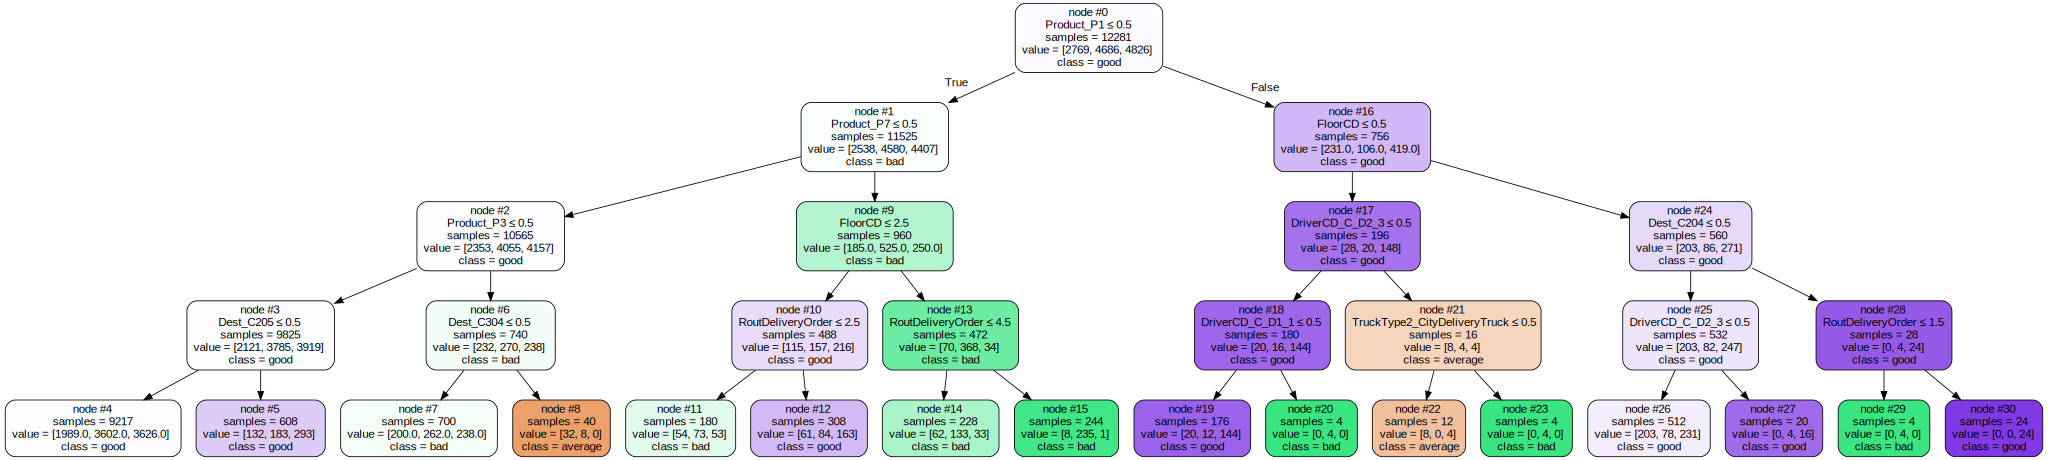

In [36]:
stars_class.loc[stars <= 2] = "bad"
stars_class.loc[stars == 3] = "average"
stars_class.loc[stars >= 4] = "good"

delivery_tree = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 2, min_samples_leaf = 1)
delivery_tree.fit(var1, stars_class)

export_graphviz(delivery_tree,
                feature_names=list(var1.columns.values),
                out_file="delivery_tree.dot",
                class_names=np.unique(stars_class.astype(str)),
                filled=True,
                rounded=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel = False)

with open("delivery_tree.dot") as delivery_tree_image:
    delivery_tree_graph = delivery_tree_image.read()
    
graphviz.Source(delivery_tree_graph)

## Parece que o P7 é chave nesta árvore não?

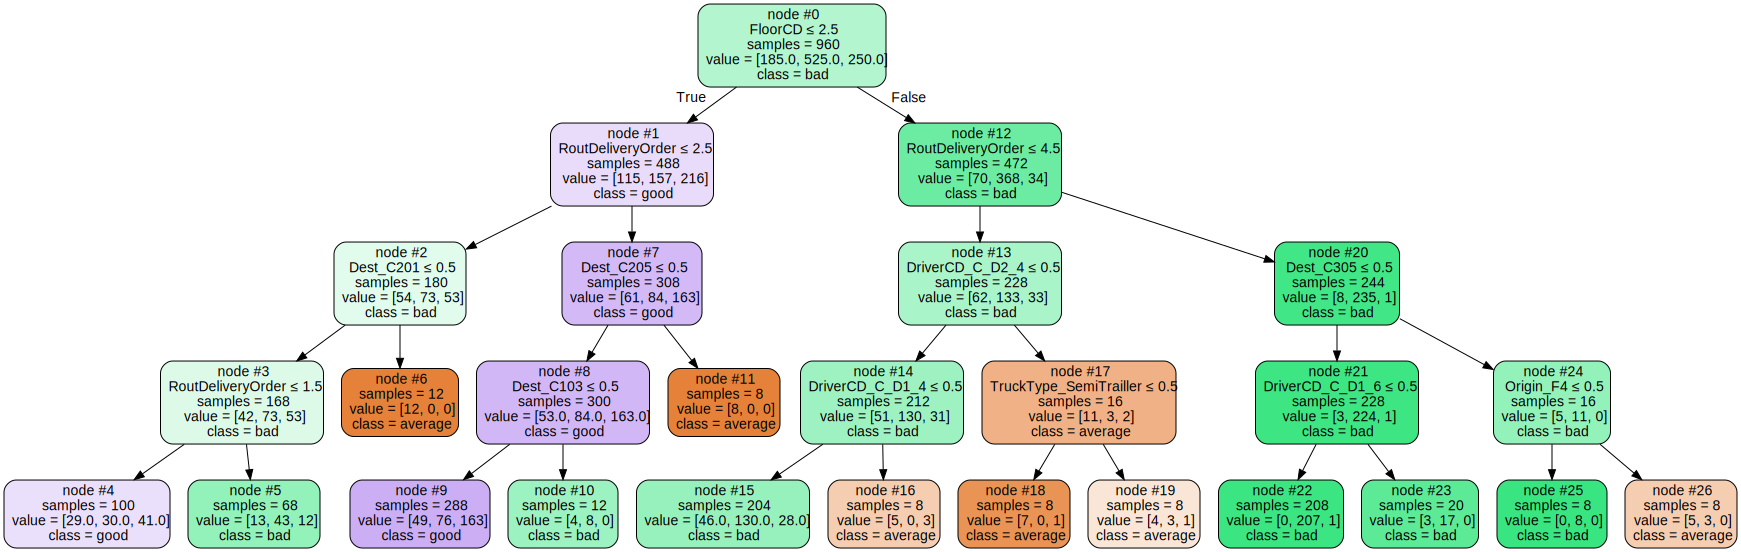

In [43]:
stars_class_p7 = stars_class[var1["Product_P7"]==1]
var1_p7 = var1[var1["Product_P7"]==1]


delivery_tree = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 2, min_samples_leaf = 1)
delivery_tree.fit(var1_p7, stars_class_p7)

export_graphviz(delivery_tree,
                feature_names=list(var1.columns.values),
                out_file="delivery_tree.dot",
                class_names=np.unique(stars_class.astype(str)),
                filled=True,
                rounded=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel = False)

with open("delivery_tree.dot") as delivery_tree_image:
    delivery_tree_graph = delivery_tree_image.read()
    
graphviz.Source(delivery_tree_graph)

### Parece que o andar onde alocamos os P07 também tem um papel importante né?

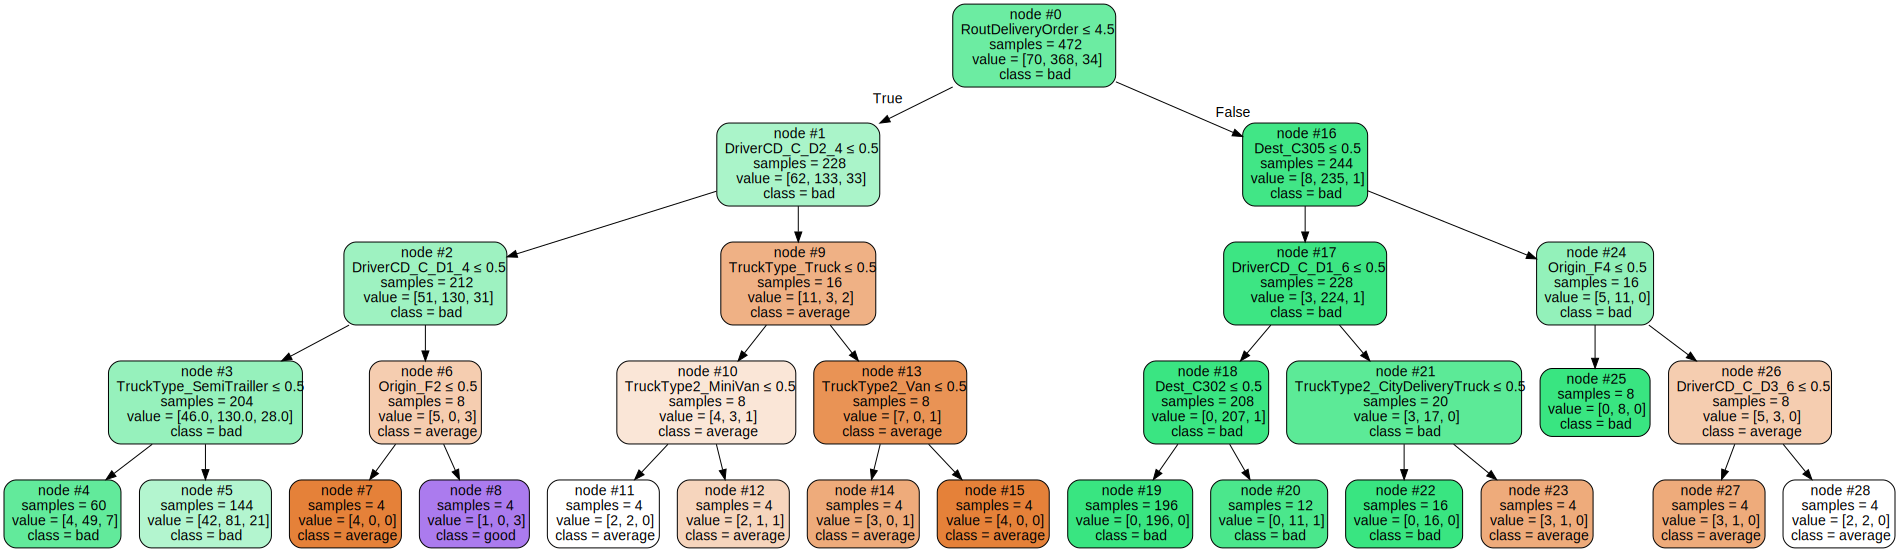

In [46]:
stars_class_floor34 = stars_class_p7[var1_p7["FloorCD"]>=3]
var1_floor34 = var1_p7[var1_p7["FloorCD"]>=3]


delivery_tree = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 2, min_samples_leaf = 1)
delivery_tree.fit(var1_floor34, stars_class_floor34)

export_graphviz(delivery_tree,
                feature_names=list(var1.columns.values),
                out_file="delivery_tree.dot",
                class_names=np.unique(stars_class.astype(str)),
                filled=True,
                rounded=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel = False)

with open("delivery_tree.dot") as delivery_tree_image:
    delivery_tree_graph = delivery_tree_image.read()
    
graphviz.Source(delivery_tree_graph)

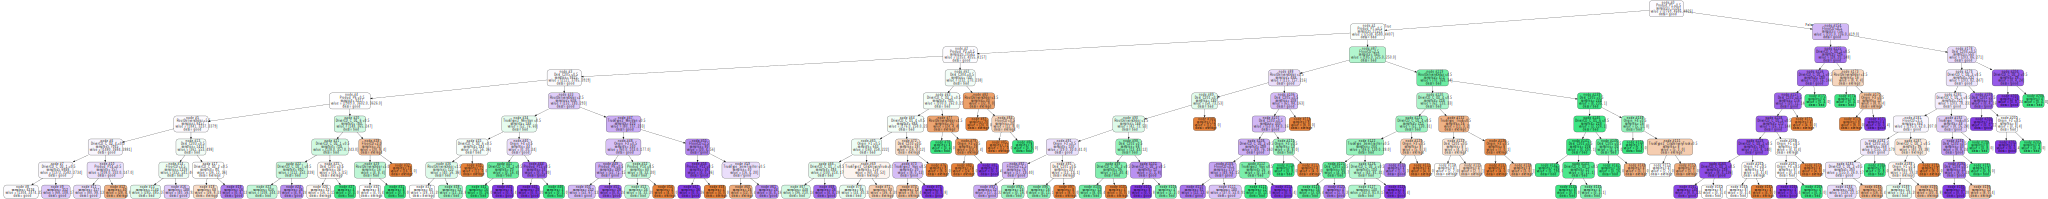

In [39]:
#Podemos construir uma arvore com maior profundidade e explorar cada bifurcação interesante dela

delivery_tree = tree.DecisionTreeClassifier(max_depth = 8, min_samples_split = 2, min_samples_leaf = 1)
delivery_tree.fit(var1, stars_class)

export_graphviz(delivery_tree,
                feature_names=list(var1.columns.values),
                out_file="delivery_tree.dot",
                class_names=np.unique(stars_class.astype(str)),
                filled=True,
                rounded=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel = False)

with open("delivery_tree.dot") as delivery_tree_image:
    delivery_tree_graph = delivery_tree_image.read()
    
graphviz.Source(delivery_tree_graph)

### Podemos notar pelo exemplo que arvores de decisão podem ser muito uteis para análisar dados, principalmente quando temos muitas categorias

## Fique Conectado

- [![YouTube](https://img.icons8.com/ios-filled/40/000000/youtube-play.png)](https://www.youtube.com/@LigaDataScience/videos)  
  Explore nossos vídeos educacionais e webinars sobre ciência de dados, machine learning e inteligência artificial. Inscreva-se para não perder nenhuma atualização!

- [![LinkedIn](https://img.icons8.com/ios-filled/40/000000/linkedin.png)](https://www.linkedin.com/company/liga-data-science-ufpr/)  
  Siga-nos no LinkedIn para as últimas novidades, oportunidades de carreira e networking profissional no campo da ciência de dados.

- [![Instagram](https://img.icons8.com/ios-filled/40/000000/instagram-new.png)](https://www.instagram.com/ligadatascience/)  
  Confira nosso Instagram para conteúdos dos bastidores, destaques de eventos e o dia a dia da Liga Data Science. Faça parte da nossa jornada!


## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

<a href="https://www.linkedin.com/in/joão-gabriel-santin-botelho/" target="_blank">João Gabriel</a>

## Referências:

* Documentação da biblioteca <a href="https://pandas.pydata.org/docs/">Pandas</a>
* Documentação do método <a href=https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html>cross_val_score</a>
 * Documentação do método <a href=https://scikit-learn.org/1.5/modules/tree.html>Decision Trees</a>
  
## Log de modificações

| Data | Versão | Modificado por | Descrição |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 04-04-2021       | 1.0     | Eduardo Pecora    | Inicial               |
| 03-11-2021       | 1.1     | Eduardo Pecora    | Estrutura Aula        |
| 27-05-2024       | 1.11     | Eduardo Pecora    | Adequação Scikit-learn        |
| 16-10-2024       | 1.12     | João Gabriel    | Ajustes Gerais      |

&copy; Liga Data Science/UFPR 2024
